## Fastai Lesson 3

In [211]:
from fastai.vision.all import *
from utils import *

### Mnist workout

In [212]:
path = untar_data(URLs.MNIST_SAMPLE)

In [213]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [214]:
print((path/'train').ls())
print();
print((path/'valid').ls())

[Path('/root/.fastai/data/mnist_sample/train/7'), Path('/root/.fastai/data/mnist_sample/train/3')]

[Path('/root/.fastai/data/mnist_sample/valid/7'), Path('/root/.fastai/data/mnist_sample/valid/3')]


In [215]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()


In [216]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [217]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [218]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [219]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4: 15, 4: 15])
df.style.set_properties(**{'font-size': '10pt', 'background-color': 'red', 
                          'color':'red',
                          'align': 'center'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254
2,0,0,0,48,166,224,253,253,234,196,253
3,0,93,244,249,253,187,46,10,8,4,10
4,0,107,253,253,230,48,0,0,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43
6,0,0,0,0,0,0,0,0,0,0,249
7,0,0,0,0,0,0,0,14,101,223,253
8,0,0,0,0,0,11,166,239,253,253,253
9,0,0,0,0,0,16,248,250,253,253,253


In [220]:
sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [221]:
sevens_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(sevens_tensors), len(three_tensors), sevens_tensors[1].shape

(6265, 6131, torch.Size([28, 28]))

<AxesSubplot:>

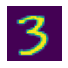

In [222]:
show_image(three_tensors[1])

In [223]:
print(three_tensors[1].shape)
print(type(three_tensors))

torch.Size([28, 28])
<class 'list'>


In [224]:
torch.stack?

In [225]:
stacked_sevens = torch.stack(sevens_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [226]:
print(stacked_sevens.shape)
print(stacked_sevens.dim())

torch.Size([6265, 28, 28])
3


<AxesSubplot:>

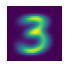

In [227]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<AxesSubplot:>

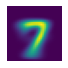

In [228]:
mean7 = stacked_sevens.mean(0)
show_image(stacked_sevens.mean(0))

In [229]:
np.stack?

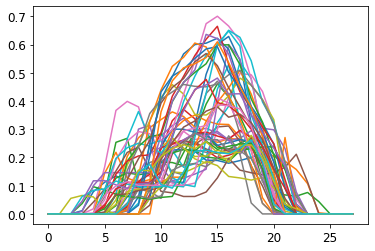

In [230]:
import matplotlib.pyplot as plt

for i in range(0, 50):
    plt.plot(stacked_sevens[i].mean(0))

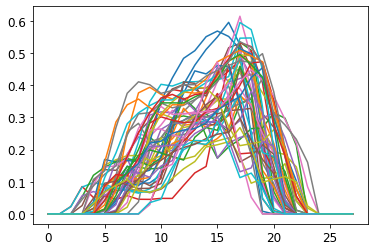

In [231]:
for i in range(0, 50):
    plt.plot(stacked_threes[i].mean(0))

<AxesSubplot:>

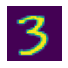

In [232]:
a_3 = stacked_threes[1]
show_image(a_3)

In [233]:
distance_3_abs = (a_3 - a_3.mean(0)).abs().mean()
distance_3_sqt = (a_3 - a_3.mean(0)**2).mean().sqrt()

distance_3_abs, distance_3_sqt

(tensor(0.1718), tensor(0.3107))

In [234]:
F.l1_loss(a_3.float(), mean3), F.mse_loss(a_3, mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [235]:
data = [[1,2,3], [4,5,6]]

arr = array(data)
tns = tensor(data)

arr, tns

(array([[1, 2, 3],
        [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [236]:
tns[1]

tensor([4, 5, 6])

In [237]:
tns[:, 0:2]

tensor([[1, 2],
        [4, 5]])

In [238]:
t = tns[:, 0:2] * 10
t

tensor([[10, 20],
        [40, 50]])

In [239]:
valid_3_tns = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()])
valid_3_tns = valid_3_tns.float()/255

valid_7_tns = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()])
valid_7_tns = valid_7_tns.float()/255

In [240]:
valid_3_tns.shape

torch.Size([1010, 28, 28])

In [241]:
mean3.shape

torch.Size([28, 28])

In [242]:
def mnist_distance(a, b): return (a-b).abs().mean((-1, -2))

mnist_distance(a_3, mean3)

tensor(0.1114)

In [243]:
valid_dist_3 = mnist_distance(valid_3_tns, mean3)
valid_dist_3, valid_dist_3.shape

(tensor([0.1251, 0.1153, 0.1232,  ..., 0.1413, 0.1197, 0.1300]),
 torch.Size([1010]))

In [244]:
tensor([1,2,3]) + tensor([1,1,1]) #element wise operation

tensor([2, 3, 4])

In [245]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [246]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [247]:
is_3(valid_3_tns)

tensor([True, True, True,  ..., True, True, True])

In [248]:
accuracy_3 = is_3(valid_3_tns).float().mean()
accuracy_7 = 1 - is_3(valid_7_tns).float().mean()

In [249]:
accuracy_3, accuracy_7

(tensor(0.9168), tensor(0.9854))

# Sgd

In [250]:
def f(x): return x**2

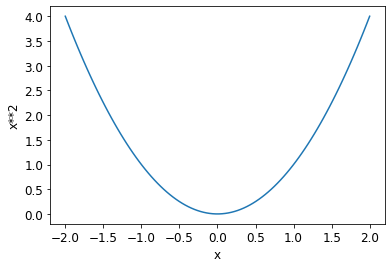

In [251]:
plot_function(f, 'x', 'x**2')

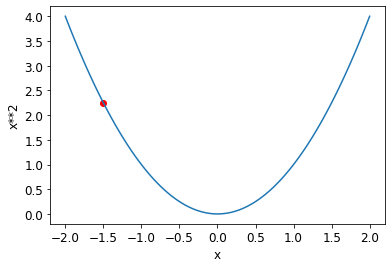

In [252]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

# we need to reach 0.0 with the help of sgd

In [253]:
xt = tensor(3.).requires_grad_()

In [254]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [255]:
yt.backward()

In [256]:
xt.grad

# derivative of x**2 is 2 * x ** 2-1
# so 2 * 3 ** 2-1

tensor(6.)

In [257]:
xt = tensor([1,2,3], dtype=float).requires_grad_()
xt

tensor([1., 2., 3.], requires_grad=True)

In [258]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(14., grad_fn=<SumBackward0>)

In [259]:
yt.backward()
xt.grad

tensor([2., 4., 6.])

In [260]:
yt

tensor(14., grad_fn=<SumBackward0>)

# An end-to-end sgd 

In [261]:
time = torch.arange(0, 20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

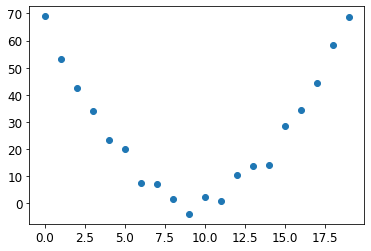

In [262]:
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5) ** 2 + 1
plt.scatter(time, speed);

In [263]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) +c

In [264]:
def mse(pred, targets): return ((pred-targets)**2).mean()

### step 1 : initialize the parameters

In [265]:
params = torch.randn(3).requires_grad_()

### step 2: calculate the predictions

In [266]:
pred = f(time, params)

In [267]:
def show_pred(preds, ax=None):
    if ax is None: 
        ax = plt.subplots()[1]
        ax.scatter(time, speed)
        ax.scatter(time, to_np(preds), color='red')
        ax.set_ylim(-300, 100)

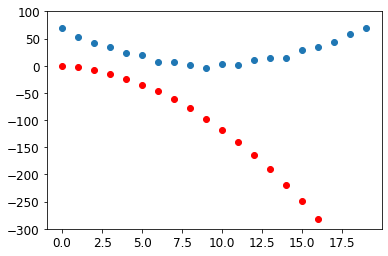

In [268]:
show_pred(pred)

### step 3 calculate the loss

In [269]:
loss = mse(pred, speed)
loss

tensor(44303.4336, grad_fn=<MeanBackward0>)

### step 4 calculate the gradient

In [270]:
loss.backward()
params.grad

tensor([-70081.5938,  -4524.8066,   -331.8645])

In [271]:
# picking a learning rate

In [272]:
params.grad * 1e-5

tensor([-0.7008, -0.0452, -0.0033])

In [273]:
params

tensor([-0.9688, -2.0971,  0.1009], requires_grad=True)

### Step 5 step the weights

In [274]:
lr = 1e-5

params.data -= lr * params.grad.data
params.grad = None

In [275]:
preds = f(time, params)
mse(preds, speed)

tensor(8916.0801, grad_fn=<MeanBackward0>)

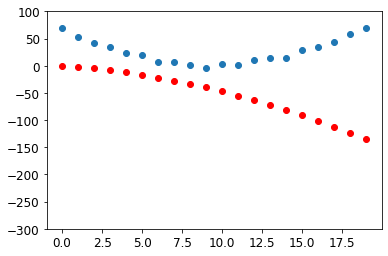

In [276]:
show_pred(preds)

In [277]:
def apply_step(params, prn=True):
    pred = f(time, params)
    loss = mse(pred, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    if prn: print(loss.item())
    return preds

In [278]:
for i in range(10): apply_step(params)

8916.080078125
2219.70166015625
1822.960693359375
8495.7841796875
9287.767578125
2661.76416015625
1477.1051025390625
8032.7744140625
9605.6376953125
3142.945556640625


In [279]:
params

tensor([ 0.4074, -1.9935,  0.1203], requires_grad=True)

In [280]:
pred = f(time, params)

In [281]:
loss = mse(pred, speed)

In [282]:
loss

tensor(1186.9855, grad_fn=<MeanBackward0>)

In [283]:
params.data

tensor([ 0.4074, -1.9935,  0.1203])

In [284]:
params.grad.data

tensor([-43270.1758,  -3048.1758,   -429.5517])

In [285]:
loss.backward()

In [286]:
params.grad.data

tensor([-35538.9727,  -2578.9490,   -419.4882])

In [287]:
params.data

tensor([ 0.4074, -1.9935,  0.1203])

## MNIST Loss function

In [180]:
torch.cat?

In [288]:
x = torch.randn(4)
g = torch.cat([x,x]).view(-1, 2)
g

tensor([[0.6100, 1.4594],
        [2.0099, 0.2302],
        [0.6100, 1.4594],
        [2.0099, 0.2302]])

In [289]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28 * 28)

In [290]:
train_y = tensor([1] * len(threes) + [0]* len(sevens)).unsqueeze(1)

In [291]:
train_y.shape, train_x.shape

(torch.Size([12396, 1]), torch.Size([12396, 784]))

In [292]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [293]:
valid_x = torch.cat([valid_3_tns, valid_7_tns]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tns) + [0]* len(valid_7_tns)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))
x_valid, y_valid  = valid_dset[0]
x_valid.shape, y_valid

(torch.Size([784]), tensor([1]))

In [294]:
# Initialize weights

In [319]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [320]:
weights = init_params((28*28, 1))
weights.shape

torch.Size([784, 1])

In [321]:
bias = init_params(1)
bias.shape

torch.Size([1])

In [322]:
# calculate a prediction for one image

(train_x[0] * weights.T).sum() + bias

tensor([0.6847], grad_fn=<AddBackward0>)

In [318]:
# np.dot(array(train_x), weights.detach().numpy()) + bias.detach().numpy()

array([[-4.6451344],
       [-1.3897704],
       [-3.070284 ],
       ...,
       [13.911477 ],
       [ 4.1510634],
       [ 8.961146 ]], dtype=float32)

In [323]:
def linear1(xb): return xb@weights + bias

preds = linear1(train_x)
preds

tensor([[ 0.6847],
        [ 3.1705],
        [-4.7494],
        ...,
        [-4.2300],
        [-9.7435],
        [-6.0806]], grad_fn=<AddBackward0>)

In [325]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [326]:
corrects.float().mean().item()

0.6045498251914978

In [334]:
 # change in accuracy for small change in one of the weghts

weights[1] *= 0.001

In [335]:
preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.6045498251914978

In [352]:
trgts = tensor([1, 0, 1])
prds = tensor([0, 0, 0])

In [353]:
torch.where(trgts == 1, 1-prds, prds).float().mean()

tensor(0.6667)

In [356]:
def mnist_loss(prediction, targets): 
    return torch.where(targets==1, 1 - prediction, prediction).float().mean()

In [361]:
mnist_loss(tensor([0.3, 0.2, 0.1]), trgts)

tensor(0.6000)

## Sigmoid

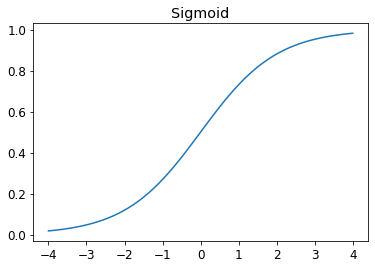

In [362]:
def sigmoid(x): return 1/(1+torch.exp(-x))

plot_function(torch.sigmoid, title='Sigmoid', min = -4, max = 4)

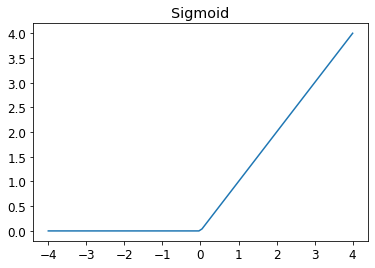

In [363]:

plot_function(torch.relu, title='Sigmoid', min = -4, max = 4)

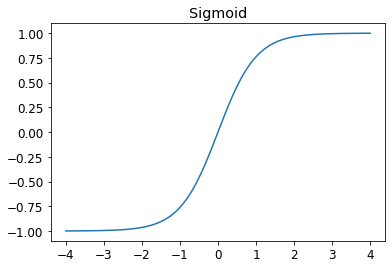

In [365]:

plot_function(torch.tanh, title='Sigmoid', min = -4, max = 4)

In [366]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).float().mean()

In [377]:
coll = range(1, 21)

dl = DataLoader(coll, batch_size=5)

In [378]:
list(dl)

[tensor([1, 2, 3, 4, 5]),
 tensor([ 6,  7,  8,  9, 10]),
 tensor([11, 12, 13, 14, 15]),
 tensor([16, 17, 18, 19, 20])]

In [380]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [382]:
dl = DataLoader(ds, batch_size=6)
list(dl)

[(tensor([0, 1, 2, 3, 4, 5]), ('a', 'b', 'c', 'd', 'e', 'f')),
 (tensor([ 6,  7,  8,  9, 10, 11]), ('g', 'h', 'i', 'j', 'k', 'l')),
 (tensor([12, 13, 14, 15, 16, 17]), ('m', 'n', 'o', 'p', 'q', 'r')),
 (tensor([18, 19, 20, 21, 22, 23]), ('s', 't', 'u', 'v', 'w', 'x')),
 (tensor([24, 25]), ('y', 'z'))]

## Putting it all together

In [384]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [386]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [389]:
valid_dl = DataLoader(valid_dset, batch_size=256)

#### runing sample

In [403]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [404]:
preds = linear1(batch)
preds

tensor([[ -1.3375],
        [ -8.9693],
        [-10.2781],
        [ -8.0438]], grad_fn=<AddBackward0>)

In [405]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9479, grad_fn=<MeanBackward0>)

In [406]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0059), tensor([-0.0413]))

#### back to main

In [396]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [397]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0118), tensor([-0.0826]))

In [398]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [399]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [407]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [408]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [409]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [420]:
## training for 1 time
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9676

### Creating an optimizer

In [421]:
linear_model = nn.Linear(28* 28, 1)

In [422]:
nn.Linear?

In [423]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [424]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [425]:
opt = BasicOptim(linear_model.parameters(), lr)

In [426]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [427]:
 validate_epoch(linear_model)
    

0.5203

In [428]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [429]:
train_model(linear_model, 20)

0.4932 0.7646 0.8594 0.9179 0.9355 0.9497 0.958 0.9634 0.9663 0.9687 0.9707 0.9721 0.9736 0.9746 0.9761 0.9775 0.9775 0.9775 0.978 0.9785 

In [430]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8754 0.8183 0.9096 0.9331 0.9453 0.9555 0.9619 0.9653 0.9668 0.9697 0.9721 0.9726 0.9751 0.9761 0.9761 0.9775 0.978 0.978 0.9785 

In [432]:
dls = DataLoaders(dl, valid_dl)

In [437]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD,
                   loss_func = mnist_loss, metrics=batch_accuracy)

In [441]:
learn.fit(20)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.010153,0.017688,0.985280,00:00
1,0.010151,0.017687,0.985280,00:00
2,0.010149,0.017686,0.985280,00:00
3,0.010147,0.017685,0.985280,00:00
4,0.010145,0.017684,0.985280,00:00
5,0.010143,0.017683,0.985280,00:00
6,0.010140,0.017682,0.985280,00:00
7,0.010138,0.017681,0.985280,00:00
8,0.010136,0.017680,0.985280,00:00
9,0.010133,0.017679,0.985280,00:00
